<a href="https://colab.research.google.com/github/swapnil-mergal/Capstone-Project-2-Ted-Talk-review-Prediction/blob/main/Capstone_Project_2_Ted_Talk_View_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

In [9]:
import pandas as pd
import numpy as np

from scipy import stats

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

from xgboost import XGBRegressor, plot_importance

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv("/data_ted_talks.csv")

In [12]:
#top five rows of data
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [13]:
# bottom five rows
df.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [14]:
#shape of the data
df.shape

(4005, 19)

In [15]:
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [16]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [17]:
#checking details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [18]:
#print the unique value
df.nunique()

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

In [19]:
#looking at null values
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [20]:
#checking datatype
df.dtypes

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

In [21]:
# checking astype
df.astype

<bound method NDFrame.astype of       talk_id                                             title  \
0           1                       Averting the climate crisis   
1          92                   The best stats you've ever seen   
2           7                                  Simplicity sells   
3          53                               Greening the ghetto   
4          66                       Do schools kill creativity?   
...       ...                                               ...   
4000    62678       Crisis support for the world, one text away   
4001    62782                      The dark history of IQ tests   
4002    62263  How "policing for profit" undermines your rights   
4003    62784      The electrifying speeches of Sojourner Truth   
4004    62794              The most important anus in the ocean   

                 speaker_1                 all_speakers  \
0                  Al Gore               {0: 'Al Gore'}   
1             Hans Rosling          {0: 'Hans

In [22]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


# Preprocessing dataset

In [23]:
# null values in the data
df.isna().sum()
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

* we have null values in occupations , about_speakers , recorded_date and comments.
* we have to drop few columns as they are of no use.
* As well as we have to drop occupations , about_speakers , recorded_date and comments column as they contain null values.

In [24]:
#droping the columns
df.drop(['url','all_speakers', 'about_speakers','native_lang','occupations','about_speakers','recorded_date','comments'],axis = 1,inplace=True)

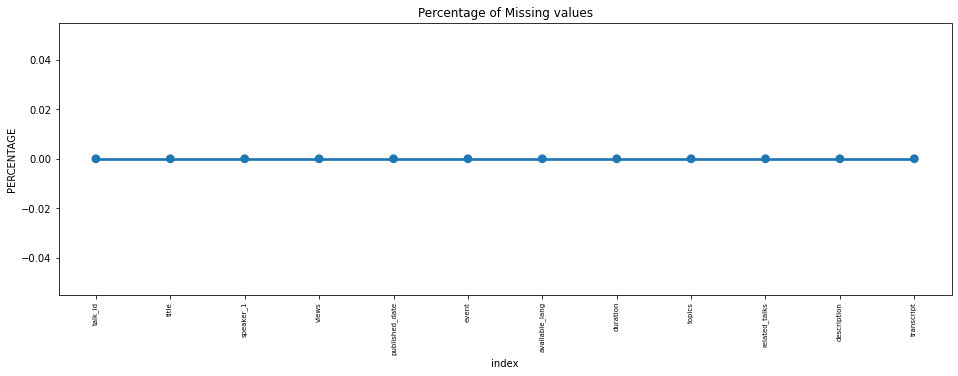

In [25]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**As we can see now we do not have any null or missing value in our data**

In [26]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#**Transformation of the columns**

1.converting time from seconds to minutes.

In [27]:
df['duration'] = pd.to_timedelta(df['duration'])

In [28]:
df['min_length'] = df['duration'].dt.total_seconds() / 60
df.drop('duration', axis = 1, inplace = True)

2.Breaking published_date column

In [29]:
df['published_date'][1]

'2006-06-27'

In [30]:
df['published_date'] = pd.to_datetime(df['published_date'])

In [31]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day_name()

In [32]:
df.drop('published_date', axis = 1, inplace = True)

In [33]:
df.head(1)

,talk_id,title,speaker_1,views,event,available_lang,topics,related_talks,description,transcript,min_length,year,month,day
0,1,Averting the climate crisis,Al Gore,3523392,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...","['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1.628333e-08,2006,6,Tuesday


Now we have three new column for year , month and day

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   views           4005 non-null   int64  
 4   event           4005 non-null   object 
 5   available_lang  4005 non-null   object 
 6   topics          4005 non-null   object 
 7   related_talks   4005 non-null   object 
 8   description     4005 non-null   object 
 9   transcript      4005 non-null   object 
 10  min_length      4005 non-null   float64
 11  year            4005 non-null   int64  
 12  month           4005 non-null   int64  
 13  day             4005 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 438.2+ KB


# **Exploratory Data Analysis Of The Data Set**

**Analysing the views on basis of year**

In [35]:
df['year'].value_counts()

2019    702
2018    477
2017    315
2012    303
2011    255
2013    242
2016    242
2014    240
2010    230
2015    220
2009    215
2020    211
2008    185
2007    119
2006     49
Name: year, dtype: int64

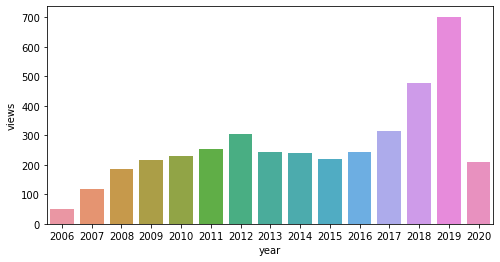

In [36]:
#checking years having maximum release 
view_acc_year = df[['year','views']].groupby('year').agg({'views' : 'count'})
view_acc_year = view_acc_year.sort_values('views',ascending=False)
view_acc_year.reset_index(inplace=True)

#Plotting the years having maximum release 
plt.figure(figsize=(8,4))
sns.barplot(x ='year', y ='views',data = view_acc_year)


We have highest number of views on ted_talk in the year **2019** followed by 2018.

**Analysing the views on basis of month**

In [37]:
df['month'].value_counts()

4     423
3     419
2     412
10    350
1     348
9     347
5     312
6     310
11    305
7     278
12    265
8     236
Name: month, dtype: int64

In [38]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['month']= df['month'].map(month_dict)

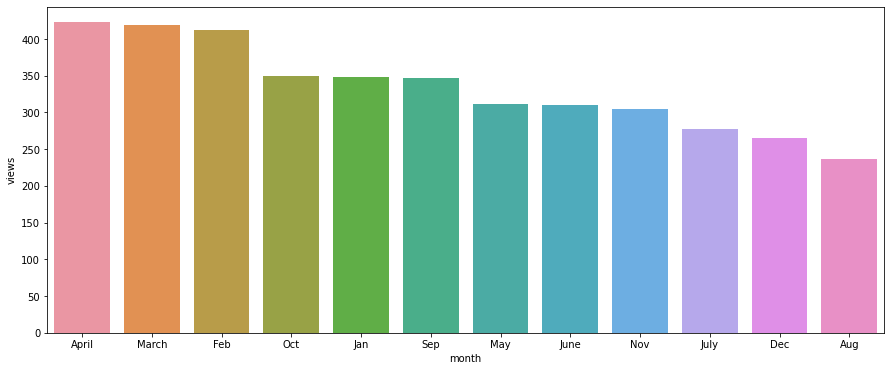

In [39]:
#checking month having maximum release
view_acc_mon = df[['month','views']].groupby('month').agg({'views' : 'count'})
view_acc_mon = view_acc_mon.sort_values('views',ascending=False)
view_acc_mon.reset_index(inplace=True)

#Plotting the years having maximum release 
plt.figure(figsize=(15,6))
sns.barplot(x ='month', y ='views',data = view_acc_mon)


We have highest number of views on ted_talk in the **April** and **March**.

**Analysing the views on basis of day**

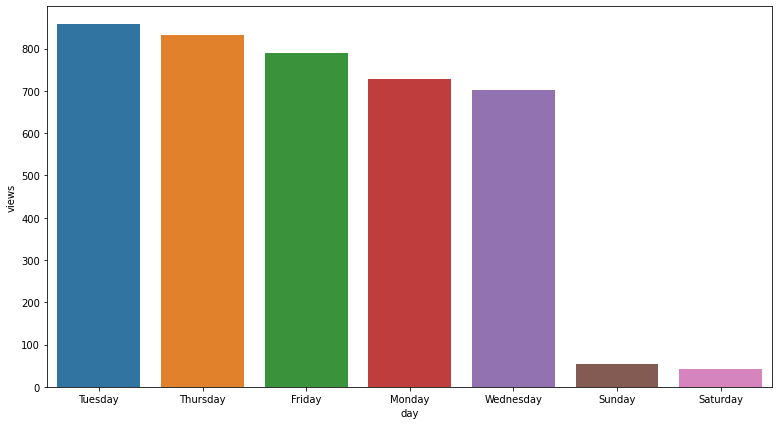

In [40]:
#checking day having maximum release
view_acc_day = df[['day','views']].groupby('day').agg({'views' : 'count'})
view_acc_day = view_acc_day.sort_values('views',ascending=False)
view_acc_day.reset_index(inplace=True)

#Plotting the years having maximum release 
plt.figure(figsize=(13,7))
sns.barplot(x ='day', y ='views',data = view_acc_day)


We have highest number of views on ted_talk **Tuesday** and **Thursday**

# explore the event column

In [41]:
#print the len of unique values in event column
len(df.event.unique())

459

We have 459 unique entries in event column

In [42]:
#find the most frequent event categories
ted_event = df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
ted_event.reset_index(inplace=True)
ted_event

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


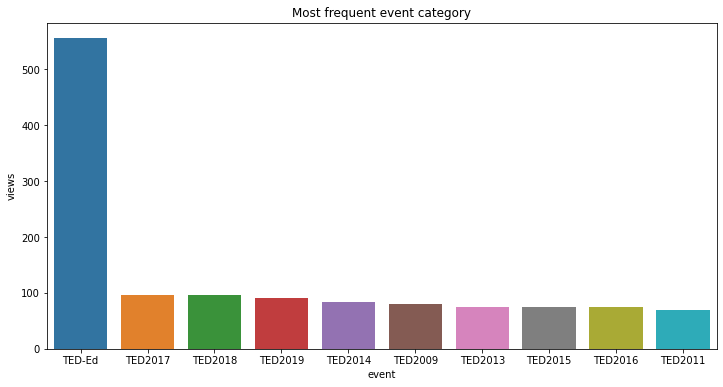

In [43]:
#plotting the most frequent event category
plt.figure(figsize=(12,6))
plt.title('Most frequent event category')
sns.barplot(x ='event',y ='views',data = ted_event)

As we can see that **TED-Ed** is the most frequent event category with 556 entries followed by **TED2017** and **TED2018**.

**Find the most popular speaker**

In [44]:
#finding the most popular speaker from the dataset
ted_speaker = df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(15,['views'])
ted_speaker.reset_index(inplace=True)
ted_speaker

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


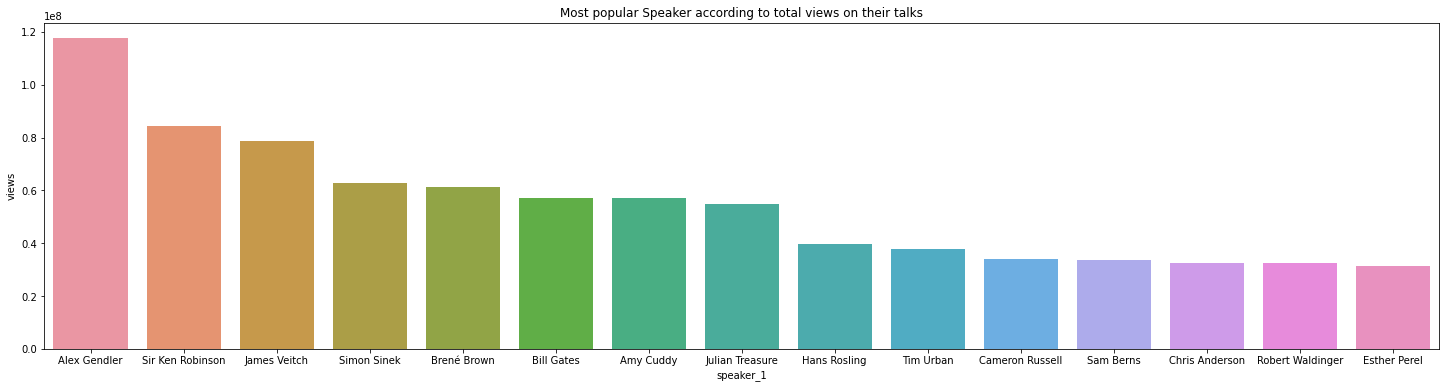

In [45]:
#ploting most popular Speaker according to total views on their talks
plt.figure(figsize=(25,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x ='speaker_1',y ='views',data = ted_speaker)

In [46]:
#Extarcting the records of top 5 most viewed videos
top_ted = df.nlargest(5, ['views'])
top_ted[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


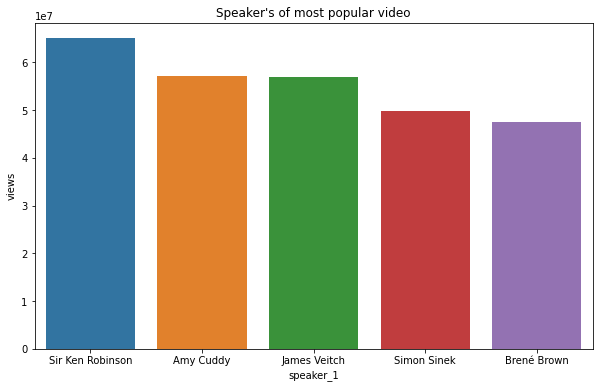

In [47]:
#finding Speaker's of most popular video
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x ='speaker_1',y ='views',data = top_ted)

**Sir Ken Robinson's** talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 6.5 million views.

**Pairplot among title , views , topics , min_length , year** 

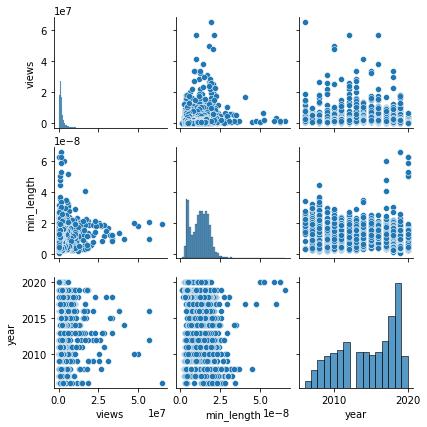

In [48]:
sns.pairplot(df[['title','views','topics','min_length','year']],  size=2)
plt.show()

 **Tittle column**

In [49]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


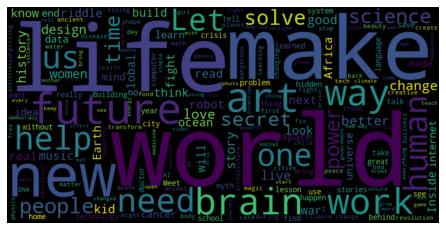

In [50]:
#chcking word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (18,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

As we can see that mejoriity of titles contains words : life, world, make, new, human, brain and future.

# Visualization Part
Visualization for numerical parts

* As shown from the graph 'views' feature is positively skewed.


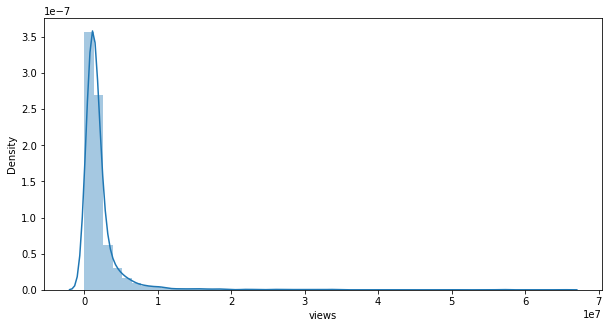

In [51]:

##visualization of the views
plt.figure(figsize=(10,5))
sns.distplot(df['views'])

* Here. our target variable is rightly skewed.

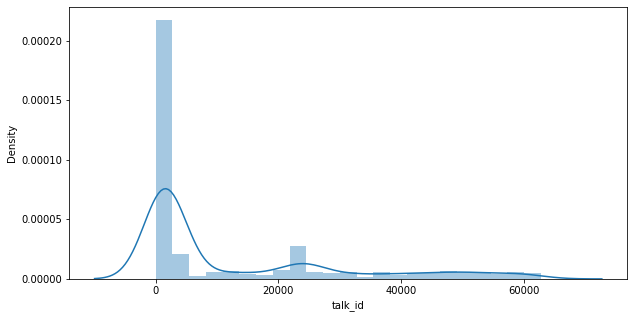

In [52]:

#visualization of talk_id
plt.figure(figsize=(10,5))
sns.distplot(df['talk_id'])

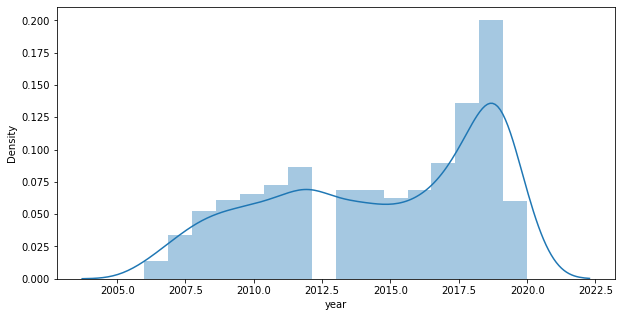

In [53]:
#plooting the distplot of year
plt.figure(figsize=(10,5))
sns.distplot(df['year'])

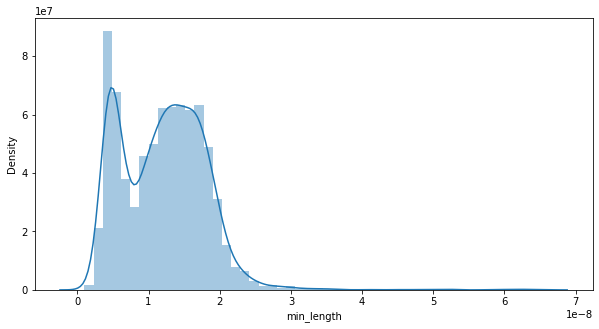

In [54]:
#plotting the distplot of min_length
plt.figure(figsize=(10,5))
sns.distplot(df['min_length'])

# #**Conclusion**

* TED Talks mainly provide inspirational and educational content that helps individuals look at things from a diffrent prespective.There is a wide variety of TED Talks, ranging from technology  to comedy.From the given dataset,We can infer that the popularity of a TED Talk depends on the number of languages available.It also marked with a good sense of humor,presentation skills and mostimportantly,choice of topic etc.

* According to analysis We have highest number of views on ted talk in the year **2019** followed by 2018.Also we have highest number of views on ted talk in the **April** followed by **March**.

* **TED-ED** is the most frequent event category with 556 entries followed by **TED2017** and **TED2018**.

* **Alex Gendler** is the most popular speaker followed by sir **Ken Robinson** according to total views on their talks.

* **Sir Ken Robinson's** talk on "Do School Kill Creativity?" is the most popular TED Talk of all time with more than 6.5 million view.

* As we can see that mejority of titles contain words: **Life , World , Make ,   New , Human , Brain and Future**.

* Applying train test split and we found linear regression 83%.As well as 83% with lasso regression and ridge regression.

* Random Forest Regressor with 95%.

* The objective of this work was to understand a little about the TED talks ratings. They are intersting metrics to evaluate a TED Talk and this work explored the many results,how people evaluate them and what may influence these results.

In [55]:
# importing Datetime
from datetime import datetime
import calendar
# Setting the Datetime formate: 
today = datetime.now()
today.strftime('%Y-%m-%d')

'2022-12-10'

In [56]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
     

# speaker vs. talks delivered:

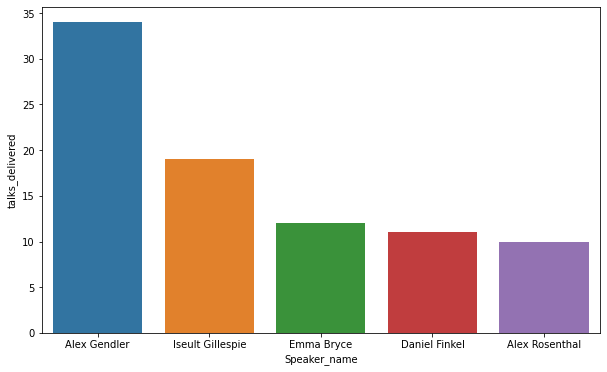

In [57]:
# Speaker vs. talks delivered:
speaker_count = df['speaker_1'].value_counts().to_frame()
data_speaker_count = pd.DataFrame(speaker_count)
data_speaker_count = data_speaker_count.reset_index()
data_speaker_count.columns = ['Speaker_name', 'talks_delivered']
most_talks = data_speaker_count.nlargest(5, 'talks_delivered')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker_name', y = 'talks_delivered', data = most_talks)
     

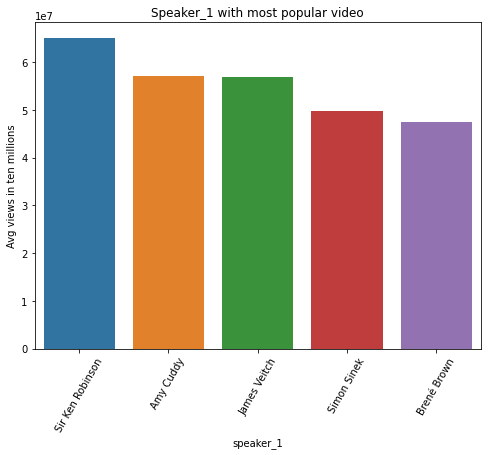

In [58]:
# Speaker most popular video
temp=df[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most popular video')
plt.ylabel('Avg views in ten millions')
ax.grid(False)
     

# Speaker 1 Vs Views

Text(0.5, 1.0, 'Most popular speaker according to views')

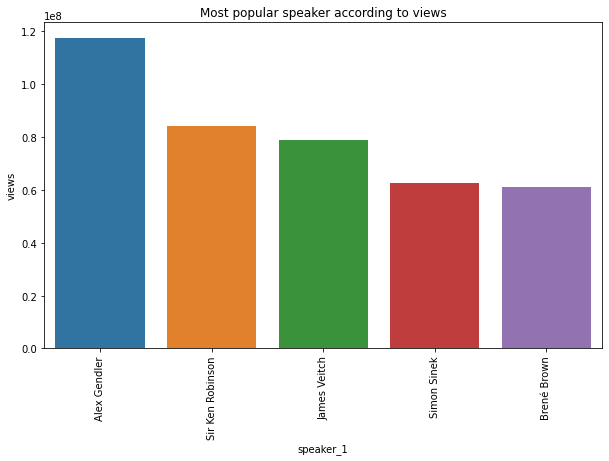

In [59]:
temp=df.groupby(['speaker_1'],as_index=False)['views'].sum().sort_values('views',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp);
plt.setp(ax.get_xticklabels(), rotation=90);
plt.title('Most popular speaker according to views')
     


# Applying target encoding on speaker1

In [60]:

speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(speaker)

# plot of speaker_1_avg_views:

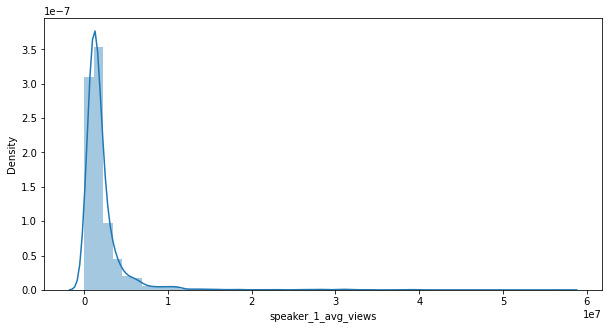

In [61]:
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

# **Conclusion**

 * TED Talks mainly provide inspirational and educational content that helps individuals look at things from a diffrent prespective.There is a wide variety of TED Talks, ranging from technology  to comedy.From the given dataset,We can infer that the popularity of a TED Talk depends on the number of languages available.It also marked with a good sense of humor,presentation skills and mostimportantly,choice of topic etc.

* According to analysis We have highest number of views on ted talk in the year **2019** followed by 2018.Also we have highest number of views on ted talk in the **April** followed by **March**.

* **TED-ED** is the most frequent event category with 556 entries followed by **TED2017** and **TED2018**.

* **Alex Gendler** is the most popular speaker followed by sir **Ken Robinson** according to total views on their talks.

* **Sir Ken Robinson's** talk on "Do School Kill Creativity?" is the most popular TED Talk of all time with more than 6.5 million view.

* As we can see that mejority of titles contain words: **Life , World , Make ,   New , Human , Brain and Future**.

* Applying train test split and we found linear regression 83%.As well as 83% with lasso regression and ridge regression.

* Random Forest Regressor with 95%.

* The objective of this work was to understand a little about the TED talks ratings. They are intersting metrics to evaluate a TED Talk and this work explored the many results,how people evaluate them and what may influence these results.